This notebook illustrates my wrapper for using iGANs to interpolate, analogize, and so on.

Make it so images and graphs can be displayed in Jupyter

In [1]:
%matplotlib inline

The module `aia` contains the basic interface to use with iGANs.

In [2]:
import aia

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/usr/local/lib/python2.7/dist-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


Load and then display an image from a remote URL.  In this case it's a handbag at Amazon:

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:334: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  SNIMissingWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:132: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/pac

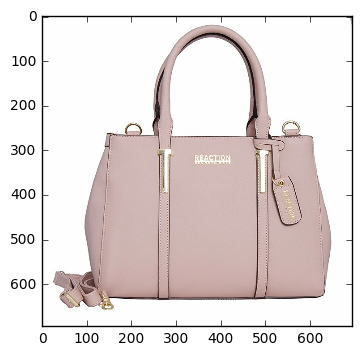

In [3]:
img0 = aia.get_image("https://images-na.ssl-images-amazon.com/images/I/61W8%2BjbJ23L._UY695_.jpg")
img1 = aia.get_image(url="https://images-na.ssl-images-amazon.com/images/I/91sYWII6-%2BL._UY695_.jpg")
aia.display_image(img0)

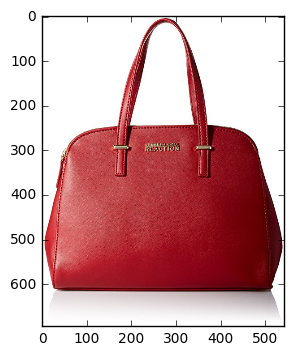

In [4]:
aia.display_image(img1)

In [10]:
vis = aia.interpolate(img0, img1, model_name="handbag_64")

LOADING...
('n_layers=', 3)
load model from ./models/handbag_64.dcgan_theano
3.00 seconds to load theano models
COMPILING...
0.45 seconds to compile _gen function
LOADING...
('n_layers=', 3)
load model from ./models/handbag_64.dcgan_theano
3.00 seconds to load theano models
COMPILING...
0.71 seconds to compile _gen function
COMPILING...
4.56 seconds to compile _bfgs function
COMPILING...
1.50 seconds to compile _feature function
COMPILING...
0.94 seconds to compile _predict function
process 1 images
reconstruct 1 images using bfgs
n_iters = 198, f = 0.155
COMPILING...
4.74 seconds to compile _bfgs function
COMPILING...
1.50 seconds to compile _feature function
COMPILING...
0.94 seconds to compile _predict function
process 1 images
reconstruct 1 images using bfgs
n_iters = 201, f = 0.111


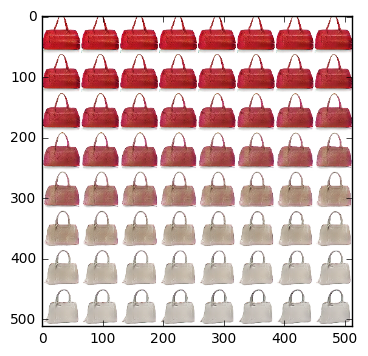

In [11]:
aia.display_image(vis)